In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import random
from sklearn import  metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso, LogisticRegression)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import time

start_time = time.time()
train_df = pd.read_csv('shuffled_half.csv')
test_df = pd.read_csv('test.csv',)
submission_df = pd.read_csv('sample_submission.csv')

print("--- %s seconds ---" % round((time.time() - start_time),1))

--- 30.8 seconds ---


In [2]:
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt

#train_df.target.value_counts().plot(kind="bar")

for i in range(0,199):

    hist = train_df['var_'+str(i)]
    #sns.set_style('darkgrid')
    #plot = sns.distplot(hist, color = 'orange')
    #mean,std=norm.fit(hist)
    #xmin, xmax = plt.xlim()
    #x = np.linspace(xmin, xmax, 100)
    #y = norm.pdf(x, mean, std)
    #plt.plot(x, y)


    train_df.describe()

    x_col = hist
    m = x_col.mean()
    z = x_col.std()

    #print(round(m,3),round(z,3))

    bins = np.array([m-4*z,m-3*z,m-2*z,m-z,m
                 ,z+m,z*2+m,z*3+m,z*4+m])
    digitized = np.digitize(x_col, bins)
    train_df['digitized'+ str(i)] = digitized

    #print(bins)

    cor = train_df.corr()
    cor.to_csv('digitized.csv')

In [3]:
#### Lets check the data to see how normal each column is ####
#from scipy.stats import shapiro
#from scipy.stats import normaltest

#cols = train_df.columns.tolist()

#for i in range (0,199):
#    stat, p = normaltest(train_df['var_' + str(i)])
#    alpha = .05
#    if p > alpha:
#        print('var_',i,'looks gaussian ','stat: ',
#              round(stat,3),'p value: ',p)
#    else:
#        print('var_',i,'DOES NOT look gaussian ','stat: ',
#              round(stat,3),'p value: ',p)

In [4]:
#shuffled = train_df.sample(frac=1)
#shuffled.to_csv('shuffled.csv')

In [5]:
#### Scale the Train and Test Data ####
start_time = time.time()
target_col = ["target"]
id_dataset = ["ID_code"]
#numerical columns
num_col_train   = [x for x in train_df.columns if x not in target_col + id_dataset]
num_col_test   = [x for x in test_df.columns if x not in target_col + id_dataset]

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(train_df[num_col_train])
scaled = pd.DataFrame(scaled,columns=num_col_train)

#dropping original values merging scaled values for numerical columns
df_data_og = train_df.copy()
train = train_df.drop(columns = num_col_train,axis = 1)
train = train.merge(scaled,left_index=True,right_index=True,how = "left")
train = train.drop(columns = ['ID_code'],axis = 1)

scaled = std.fit_transform(test_df[num_col_test])
scaled = pd.DataFrame(scaled,columns=num_col_test)

#dropping original values merging scaled values for numerical columns
df_test_og = test_df.copy()
test = test_df.drop(columns = num_col_test,axis = 1)
test = test.merge(scaled,left_index=True,right_index=True,how = "left")
test = test.drop(columns = ['ID_code'],axis = 1)

print("--- %s seconds ---" % round((time.time() - start_time),1))

C:\Users\cbi7088\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\cbi7088\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


--- 3.4 seconds ---


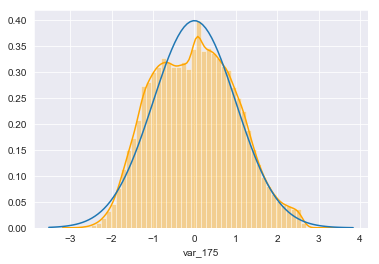

In [9]:
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt

x = train['var_175']

hist = x
sns.set_style('darkgrid')
plot = sns.distplot(hist, color = 'orange')
mean,std=norm.fit(hist)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)

In [7]:
#### Lets create features ####
start_time = time.time()

print('Original dataframe shape: ',train.shape)

column = train.columns.tolist()
#print(column)
test_list_0 = ['var_0','var_1','var_2','var_3','var_4','var_5','var_6','var_7','var_8','var_9',
              'var_10','var_11','var_12','var_13','var_14','var_15','var_16','var_17','var_18','var_19']

test_list_1 = ['var_20','var_21','var_22','var_23','var_24','var_25','var_26','var_27','var_28','var_29',
              'var_30','var_31','var_32','var_33','var_34','var_35','var_36','var_37','var_38','var_39']

test_list_2 = ['var_40','var_41','var_42','var_43','var_44','var_45','var_46','var_47','var_48','var_49',
              'var_50','var_51','var_52','var_53','var_54','var_55','var_56','var_57','var_58','var_59']

test_list_3 = ['var_60','var_61','var_62','var_63','var_64','var_65','var_66','var_67','var_68','var_69',
              'var_70','var_71','var_72','var_73','var_74','var_75','var_76','var_77','var_78','var_79']

test_list_4 = ['var_80','var_81','var_82','var_83','var_84','var_85','var_86','var_87','var_88','var_89',
              'var_90','var_91','var_92','var_93','var_94','var_95','var_96','var_97','var_98','var_99']

test_list_5 = ['var_100','var_101','var_102','var_103','var_104','var_105','var_106','var_107','var_108','var_109',
              'var_110','var_111','var_112','var_113','var_114','var_115','var_116','var_117','var_118','var_119']

test_list_6 = ['var_120','var_121','var_122','var_123','var_124','var_125','var_126','var_127','var_128','var_129',
              'var_130','var_131','var_132','var_133','var_134','var_135','var_136','var_137','var_138','var_139']

test_list_7 = ['var_140','var_141','var_142','var_143','var_144','var_145','var_146','var_147','var_148','var_149',
              'var_150','var_151','var_152','var_153','var_154','var_155','var_156','var_157','var_158','var_159']

test_list_8 = ['var_160','var_161','var_162','var_163','var_164','var_165','var_166','var_167','var_168','var_169',
              'var_170','var_171','var_172','var_173','var_174','var_175','var_176','var_177','var_178','var_179']

test_list_9 = ['var_180','var_181','var_182','var_183','var_184','var_185','var_186','var_187','var_188','var_189',
               'var_190','var_191','var_192','var_193','var_194','var_195','var_196','var_197','var_198','var_199']

test_list_10 = ['var_185','var_27','var_30','var_17','var_38','var_41','var_126','var_103','var_10','var_100',
               'var_117','var_7','var_96','var_136','var_158','var_98','var_39','var_161','var_124','var_29']

no_target_list = train.drop(columns='target',axis = 1)
no_target_list = no_target_list.columns.tolist()

for j in test_list_10:
    for i in column:
        train[j + i] = train[j] + train[i]

print('New dataframe shape:: ', train.shape)
#print(train.describe())
#describe = train.describe()

print("--- %s seconds ---" % round((time.time() - start_time),1))

Original dataframe shape:  (100000, 401)
New dataframe shape::  (100000, 8421)
--- 272.8 seconds ---


In [8]:
#### Check correlation and drop ####
start_time = time.time()

cor_t = pd.DataFrame(train).apply(lambda x: x.corr(train.target)).abs().sort_values(ascending=False)
#print(cor_t.head(1000))
cor_t.to_csv('corr_features.csv')
print("--- %s seconds ---" % round((time.time() - start_time),1))

--- 31.6 seconds ---
